In [1]:
import sys
import pandas as pd
sys.path.append('../..')

# Creature

In [2]:
from lamarck import Creature

In [3]:
genome = {
    'x': 10,
    'y': 'A',
    'z': (1, 2, 3)
}

In [4]:
creature = Creature(genome)

In [5]:
creature.id

-1132686742664702176

# Genome Creator

In [6]:
from lamarck.assistant import GenomeCreator

In [7]:
genome_creator = GenomeCreator()

In [8]:
genome_creator.add_gene_specs.numeric(name='x',
                                      min=0,
                                      max=10,
                                      progression='linear',
                                      domain='int')

genome_creator.add_gene_specs.categorical(name='y', domain=['A', 'B', 'C', 'D', 'E'])

genome_creator.add_gene_specs.vectorial(name='z', length=4, replace=False, domain=['i', 'j', 'k', 'l', 'm'])

In [9]:
genome_blueprint = genome_creator.get_genome_blueprint()

In [10]:
genome_blueprint

{'x': {'type': 'numeric',
  'domain': 'int',
  'ranges': {'min': 0, 'max': 10, 'progression': 'linear'}},
 'y': {'type': 'categorical', 'domain': ['A', 'B', 'C', 'D', 'E']},
 'z': {'type': 'vectorial',
  'domain': ['i', 'j', 'k', 'l', 'm'],
  'ranges': {'length': 4, 'replace': False}}}

# Population Creator

In [11]:
from lamarck.assistant import PopulationCreator

In [12]:
pop_creator = PopulationCreator(genome_blueprint)

In [13]:
popdet = pop_creator.create.det(10)
popdet

Population with 1000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [14]:
popdet.datasets.main.head()

,x,y,z
0,0,A,"(i, j, k, l)"
1,0,A,"(i, l, j, k)"
2,0,A,"(j, i, k, l)"
3,0,A,"(j, l, i, k)"
4,0,A,"(k, i, j, l)"


In [15]:
poprand = pop_creator.create.rand(2000)
poprand

Population with 2000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [16]:
poprand.datasets.input.head()

,x,y,z
id,,,
666509958041338162,4,B,"(l, i, k, j)"
7023763548431575953,8,C,"(j, m, k, l)"
-3391006703001545400,6,D,"(k, l, j, m)"
-5071905066210007658,2,C,"(i, l, k, m)"
-3731567702039812928,5,B,"(i, m, j, l)"


In [17]:
popdirty = popdet + poprand
popdirty

Population with 3000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [18]:
popdirty.datasets.input.head()

,x,y,z
id,,,
-711150599823231430,0,A,"(i, j, k, l)"
-5835641605386335832,0,A,"(i, l, j, k)"
-7693062973519985788,0,A,"(j, i, k, l)"
8895525364854942014,0,A,"(j, l, i, k)"
-8966928643616163701,0,A,"(k, i, j, l)"


In [19]:
pop = popdirty.drop_duplicates()
pop

Population with 2078 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [20]:
pop.datasets.input.head()

,x,y,z
id,,,
-711150599823231430,0,A,"(i, j, k, l)"
-5835641605386335832,0,A,"(i, l, j, k)"
-7693062973519985788,0,A,"(j, i, k, l)"
8895525364854942014,0,A,"(j, l, i, k)"
-8966928643616163701,0,A,"(k, i, j, l)"


# Environment

In [21]:
from lamarck import Environment

In [22]:
import hashlib

def tuplehash(tuple_obj):
    encoded = ''.join(tuple_obj).encode()
    m = hashlib.md5()
    m.update(encoded)
    d = m.digest()
    return int.from_bytes(d, 'big')
    
    
def dummy_process(x, y, z):
    zval = (tuplehash(z) % 1000) / (x+1)**0.75
    yval = zval // ord(y) + tuplehash((y, y)) % 73
    return {
        'time': (x + 1) * abs(zval - yval) // 10,
        'profit': (abs(3*zval - 2*yval)**((int(x/10) + 1) % 9) // (tuplehash((y, y)) % 7 + 1)) % 10000 + (zval*yval) //10
    }

In [23]:
env = Environment()

In [24]:
env.config.set_process(dummy_process)

In [25]:
env.config.set_output_varibles('time', 'profit')

In [26]:
env.config

multi:   False
output_varibles:   ('time', 'profit')
process:   <function dummy_process at 0x7f39b3a065e0>

In [27]:
cr = pop[10]
cr

Creature <1163125967778414808> - genome: {'x': 0, 'y': 'B', 'z': ('i', 'j', 'k', 'l')}

### Simulate Creature

In [28]:
env.simulate(cr)

{'time': 93.0, 'profit': 6323.0}

### Simulate Population

In [29]:
simpop = env.simulate(pop)

In [30]:
simpop

Population with 2078 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [31]:
simpop.datasets.output.head()

,x,y,z,time,profit
-711150599823231430,0,A,"(i, j, k, l)",95.0,2154.0
-5835641605386335832,0,A,"(i, l, j, k)",52.0,877.0
-7693062973519985788,0,A,"(j, i, k, l)",25.0,325.0
8895525364854942014,0,A,"(j, l, i, k)",76.0,1492.0
-8966928643616163701,0,A,"(k, i, j, l)",16.0,171.0


### Simulate Population - Multi Thread

In [32]:
env.config.set_multi(True)

In [33]:
simpop = env.simulate(pop)

In [34]:
simpop.datasets.output.head()

,x,y,z,time,profit
-711150599823231430,0,A,"(i, j, k, l)",95.0,2154.0
-5835641605386335832,0,A,"(i, l, j, k)",52.0,877.0
-7693062973519985788,0,A,"(j, i, k, l)",25.0,325.0
8895525364854942014,0,A,"(j, l, i, k)",76.0,1492.0
-8966928643616163701,0,A,"(k, i, j, l)",16.0,171.0


# Fitness

### 1. Single Objective

In [35]:
single_objective_pop = simpop.apply_fitness.single_objective(output='time', objective='min')

In [36]:
single_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria
8461363887649495,3,D,"(k, i, j, m)",0.0,33.0,0.0
-1962383659364999440,1,B,"(k, i, l, j)",0.0,72.0,0.0
5595222774491071447,6,E,"(l, m, i, j)",0.0,232.0,0.0
1729626594819878671,3,B,"(m, i, l, j)",0.0,60.0,0.0
-756907030698599695,4,C,"(m, i, l, j)",0.0,31.0,0.0


### 2. Multi Objective - Ranked

In [37]:
ranked_objective_pop = simpop.apply_fitness.multi_objective.ranked(priorities=['time', 'profit'], objectives=['min', 'max'])

In [38]:
ranked_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1
1193589128154534061,1,E,"(k, m, l, j)",0.0,236.0,0.0,236.0
1860729043613065368,5,E,"(j, m, i, l)",0.0,234.0,0.0,234.0
5595222774491071447,6,E,"(l, m, i, j)",0.0,232.0,0.0,232.0
2630803200567522982,8,E,"(i, l, m, j)",0.0,230.0,0.0,230.0
5014467073235153863,7,E,"(m, l, k, i)",0.0,229.0,0.0,229.0


### 3. Multi Objective - Pareto

In [39]:
pareto_objective_pop = simpop.apply_fitness.multi_objective.pareto(outputs=['time', 'profit'], objectives=['min', 'max'])

In [40]:
pareto_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1,front,crowd
-2818785265728612721,10,E,"(i, j, k, l)",122.0,10167.0,1.300701,7.827338,1,8.958610
-3369932058506276551,10,C,"(k, l, i, j)",66.0,10076.0,0.005753,7.751207,1,8.563777
-3593402087204699045,10,B,"(j, i, k, l)",24.0,7949.0,-0.965458,5.971752,1,6.670358
4721639248791679893,10,B,"(l, k, i, j)",23.0,7599.0,-0.988582,5.678941,1,6.376638
-468910374316508830,10,B,"(k, i, j, l)",6.0,1656.0,-1.381691,0.707009,1,1.389431


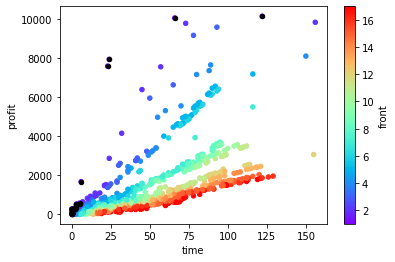

In [43]:
ax = pareto_objective_pop.plot.fronts('time', 'profit', 1)

# Selection